## 1,2: Query the API

1. Practice writing queries using the saferproducts.gov API and your web browser.
2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.

In [40]:
url = 'https://www.saferproducts.gov/RestWebServices/Recall'
#query = '?format=json&ProductType=Phone' #29
#query = '?format=json&ProductType=Grill' #70
#query = '?format=json&ProductType=Exercise' # 91
query = '?format=json&RecallTitle=Gas' # 216

### Option 1: `requests` package

In [41]:
import requests
#header = {'User-Agent': 
#          'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
#raw = requests.get(url+query,headers=header)
raw = requests.get(url+query) 
data = raw.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Option 2: `urllib` and `json` packages

In [43]:
import urllib.request
import json
import pickle
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 

import pickle
with open('json_data.pkl', 'wb') as file:
    pickle.dump(data, file)

## 3: Wrangle data

In [91]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
print(df.shape)
df.head()

(216, 22)


,RecallID,RecallNumber,RecallDate,Description,URL,Title,ConsumerContact,LastPublishDate,Products,Inconjunctions,...,Manufacturers,Retailers,Importers,Distributors,SoldAtLabel,ManufacturerCountries,ProductUPCs,Hazards,Remedies,RemedyOptions
0,10024,24329,2024-08-01T00:00:00,This recall involves two ECHO 59.7cc gas-power...,https://www.cpsc.gov/Recalls/2024/ECHO-Recalls...,ECHO Recalls Gas-Powered Backpack Blowers Due ...,ECHO at 800-432-3246 from 8 a.m. to 4:30 p.m. ...,2024-08-01T00:00:00,"[{'Name': 'ECHO gas-powered backpack blowers',...",[],...,"[{'Name': 'ECHO Inc., of Lake Zurich, Illinois...","[{'Name': 'Golden Eagle Distributing Company, ...",[],[],None,[{'Country': 'United States'}],[],"[{'Name': 'The fuel supply line can leak gas, ...",[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]
1,10004,24303,2024-07-11T00:00:00,This recall involves TonGass 8-inch round pool...,https://www.cpsc.gov/Recalls/2024/TonGass-Pool...,TonGass Pool Drain Covers Recalled Due to Viol...,"TonGass email at tongass@126.com, online at Am...",2024-07-11T00:00:00,"[{'Name': 'TonGass pool drain covers', 'Descri...",[],...,[],[{'Name': 'Exclusively online at www.amazon.co...,"[{'Name': 'Oneida International Ltd., dba TonG...",[],None,[{'Country': 'China'}],[],[{'Name': 'The recalled drain covers do not co...,[{'Name': 'Pool owners/operators and consumers...,[{'Option': 'Refund'}]
2,9926,24201,2024-04-18T00:00:00,This recall involves Gasaciods children's mult...,https://www.cpsc.gov/Recalls/2024/Gasaciods-Ch...,Gasaciods Children's Helmets Recalled Due to R...,Fengwang Sports via email at george66305@163.c...,2024-04-18T00:00:00,[{'Name': 'Gasaciods Children's Multi-Purpose ...,[],...,[],[{'Name': 'Online at Temu.com from July 2023 t...,[{'Name': 'Dongguan Feng Wang Sports Goods Co....,[],None,[{'Country': 'China'}],[],[{'Name': 'The helmets do not comply with the ...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]
3,9927,24202,2024-04-18T00:00:00,This recall involves 750mL and 1500mL sizes of...,https://www.cpsc.gov/Recalls/2024/Randder-Liqu...,Randder Liquid Fuel Bottles Recalled Due to Ri...,"Email at catherine0216@outlook.com, or online ...",2024-04-18T00:00:00,[{'Name': 'Randder 2-Pack Liquid Fuel Bottles'...,[],...,[],[{'Name': 'Amazon.com from September 2022 thro...,[],[{'Name': 'Shenzhenshi Rande Keji Youxian Gong...,None,[{'Country': 'China'}],[],[{'Name': 'The portable fuel containers do not...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Repair'}]
4,9918,24192,2024-04-11T00:00:00,This recall involves BRS portable liquid fuel ...,https://www.cpsc.gov/Recalls/2024/BRS-Liquid-F...,BRS Liquid Fuel Bottles Recalled Due to Risk o...,"Email at chencaiyu1994@hotmail.com, or online ...",2024-04-11T00:00:00,"[{'Name': 'BRS Liquid Fuel Bottles', 'Descript...",[],...,[],[{'Name': 'Amazon.com from October 2018 throug...,[],"[{'Name': 'Huenco, of China', 'CompanyID': ''}]",None,[{'Country': 'China'}],[],[{'Name': 'The portable fuel bottles do not me...,[{'Name': 'Consumers should immediately stop u...,[{'Option': 'Refund'}]


In [92]:
df.columns

Index(['RecallID', 'RecallNumber', 'RecallDate', 'Description', 'URL', 'Title',
       'ConsumerContact', 'LastPublishDate', 'Products', 'Inconjunctions',
       'Images', 'Injuries', 'Manufacturers', 'Retailers', 'Importers',
       'Distributors', 'SoldAtLabel', 'ManufacturerCountries', 'ProductUPCs',
       'Hazards', 'Remedies', 'RemedyOptions'],
      dtype='object')

In [93]:
df['ManufacturerCountries'].value_counts()

ManufacturerCountries
[{'Country': 'United States'}]                                                   61
[{'Country': 'China'}]                                                           53
[]                                                                               49
[{'Country': 'Canada'}]                                                          12
[{'Country': 'Mexico'}]                                                           9
[{'Country': 'Taiwan'}]                                                           8
[{'Country': 'China'}, {'Country': 'Hong Kong'}]                                  4
[{'Country': 'China'}, {'Country': 'Hong Kong'}, {'Country': 'South Africa'}]     2
[{'Country': 'Japan'}]                                                            2
[{'Country': 'Germany'}]                                                          2
[{'Country': 'Austria'}]                                                          2
[{'Country': 'Romania'}]                              

In [94]:
temp = df['ManufacturerCountries']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])==1 :
        clean_values.append( str(temp[i][0]['Country']) )
    elif len(temp[i])>1:
        countries = []
        for j in range(len(temp[i])):
            countries.append( temp[i][j]['Country'] )
        clean_values.append( str(countries) )
    else:
        clean_values.append('')
df['mnf_country'] = clean_values

In [95]:
df['mnf_country'].value_counts()

mnf_country
United States                             61
China                                     53
                                          49
Canada                                    12
Mexico                                     9
Taiwan                                     8
['China', 'Hong Kong']                     4
['China', 'Hong Kong', 'South Africa']     2
Japan                                      2
Germany                                    2
Austria                                    2
Romania                                    1
Israel                                     1
['China', 'Thailand']                      1
['Canada (heater)', 'Mexico (valve)']      1
South Korea                                1
India                                      1
['Taiwan', 'United States']                1
Belgium                                    1
Italy                                      1
Costa Rica                                 1
Czech Republic                             

## 3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.

In [150]:
def flatten(var):
    """ Flattens a value, recursively concatenating dictionary values. """
    temp = df[var] # Get column from the dataframe
    clean_values = [] # List for new values
    key = [*temp[0][0]][0] # Get dictionary key
    for i in range(len(temp)):
        if len(temp[i])==1 : # Only one entry in the value
            clean_values.append( str(temp[i][0][key]) ) # Convert to string and append
        elif len(temp[i])>1: # Multiple entries in the value to flatten
            new_values = [] # List for flattened entries
            for j in range(len(temp[i])): # Iterate over the dictionary
                new_values.append( temp[i][j][key] ) # For the key, append values
            clean_values.append(str(new_values) ) # Convert to string from list and append
        else:
            clean_values.append('') # Missing values get a blank
    return clean_values

In [152]:
df['remedy'] = flatten('RemedyOptions')
df['remedy'].value_counts()

<Axes: >

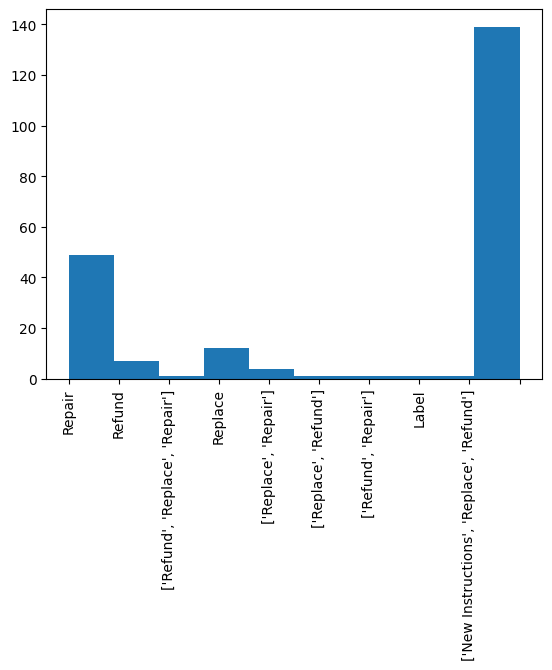

In [156]:
df['remedy'].hist(grid=False,xrot=90)

<Axes: >

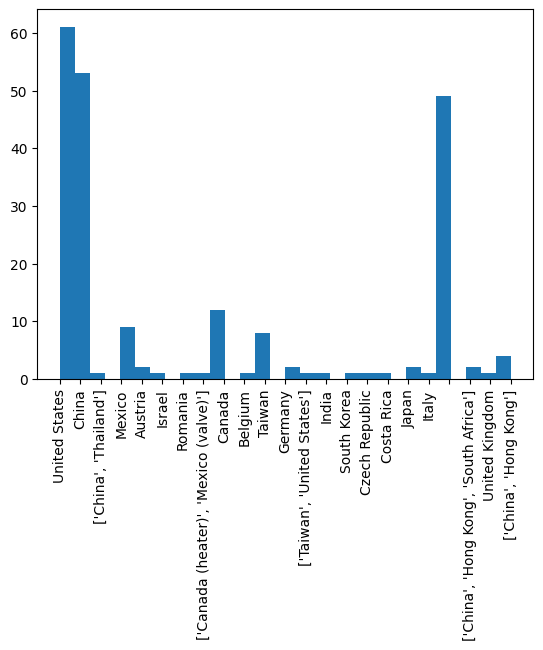

In [157]:
df['mnf_country'].hist(grid=False,xrot=90,bins=30)

In [160]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.crosstab( df['remedy'],df['mnf_country'] )

mnf_country,,Austria,Belgium,Canada,China,Costa Rica,Czech Republic,Germany,India,Israel,Italy,Japan,Mexico,Romania,South Korea,Taiwan,United Kingdom,United States,"['Canada (heater)', 'Mexico (valve)']","['China', 'Hong Kong', 'South Africa']","['China', 'Hong Kong']","['China', 'Thailand']","['Taiwan', 'United States']"
remedy,,,,,,,,,,,,,,,,,,,,,,,
,49,0,0,6,28,1,1,1,0,0,1,2,5,0,0,6,1,32,0,2,4,0,0
Label,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Refund,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Repair,0,2,1,5,11,0,0,1,1,1,0,0,3,0,1,0,0,21,1,0,0,0,1
Replace,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,1,0
"['New Instructions', 'Replace', 'Refund']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
"['Refund', 'Repair']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"['Refund', 'Replace', 'Repair']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"['Replace', 'Refund']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 4. Streamlit Dashboard (Optional)

In [ ]:
import pandas as pd
import streamlit as st
import urllib.request
import json

"""
## Dashboard Template
 
This simple dashboard provides tables from the saferproducts.gov API.

- `remedy` is how consumers were compensated for the recall
- `mnf_country` is the place where the product originated

We focus on products in which the word "gas" appeared in the Recall Title.
"""

url = 'https://www.saferproducts.gov/RestWebServices/Recall'
#query = '?format=json&ProductType=Phone' #29
#query = '?format=json&ProductType=Grill' #70
#query = '?format=json&ProductType=Exercise' # 91
query = '?format=json&RecallTitle=Gas' # 216

response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 

df = pd.DataFrame.from_dict(data)
print(df.shape)

df.head()

temp = df['ManufacturerCountries']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])==1 :
        clean_values.append( str(temp[i][0]['Country']) )
    elif len(temp[i])>1:
        countries = []
        for j in range(len(temp[i])):
            countries.append( temp[i][j]['Country'] )
        clean_values.append( str(countries) )
    else:
        clean_values.append('')
df['mnf_country'] = clean_values
st.write(df['mnf_country'].value_counts())

temp = df['RemedyOptions']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])>0:
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option'] )
        clean_values.append(values[0])
    else:
        clean_values.append('')
df['remedy'] = clean_values
st.write(df['remedy'].value_counts())

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
xtab = pd.crosstab( df['remedy'],df['mnf_country'] )

# Create streamlit output:
st.write(xtab)

**5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.**

In [12]:
import numpy as np
import pandas as pd
import urllib.request
import json
import matplotlib.pyplot as plt

## Build query:
url = 'https://api.eia.gov/v2/electricity/retail-sales/data/' 
api_key = '?api_key=YYz5xOSLjJP5ZbZ2sPbsNAuvBdEdEnSGhsEjkSFr'
query = '&frequency=monthly&data[0]=customers&data[1]=price&data[2]=revenue&data[3]=sales&facets[stateid][]=VA&start=2013-01&end=2023-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

## Query the API:
response = urllib.request.urlopen(url+api_key+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close() 

## Convert results to dataframe:
df = pd.DataFrame.from_dict(data['response']['data'])
df.to_csv('electricity_data.csv')
print(df.shape)
df.head()

(726, 13)


,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-01,VA,Virginia,ALL,all sectors,4070280,11.76,1258.2641,10696.00511,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1,2023-01,VA,Virginia,TRA,transportation,1,12.21,1.81683,14.88526,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2,2023-01,VA,Virginia,RES,residential,3618436,14.03,630.32808,4491.90335,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3,2023-01,VA,Virginia,OTH,other,None,None,None,None,number of customers,cents per kilowatthour,million dollars,million kilowatthours
4,2023-01,VA,Virginia,IND,industrial,3675,9.39,126.31832,1344.93917,number of customers,cents per kilowatthour,million dollars,million kilowatthours


## EDA:

In [2]:
data['response']['description']

'Electricity sales to ultimate customer by state and sector (number of customers, average price, revenue, and megawatthours of sales).  \r\n    Sources: Forms EIA-826, EIA-861, EIA-861M'

In [3]:
df.head()

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-01,VA,Virginia,ALL,all sectors,4070280,11.76,1258.2641,10696.00511,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1,2023-01,VA,Virginia,TRA,transportation,1,12.21,1.81683,14.88526,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2,2023-01,VA,Virginia,RES,residential,3618436,14.03,630.32808,4491.90335,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3,2023-01,VA,Virginia,OTH,other,None,None,None,None,number of customers,cents per kilowatthour,million dollars,million kilowatthours
4,2023-01,VA,Virginia,IND,industrial,3675,9.39,126.31832,1344.93917,number of customers,cents per kilowatthour,million dollars,million kilowatthours


In [4]:
select = df['sectorName'] != 'other'
df = df.loc[ select,: ]

In [5]:
df.columns

Index(['period', 'stateid', 'stateDescription', 'sectorid', 'sectorName',
       'customers', 'price', 'revenue', 'sales', 'customers-units',
       'price-units', 'revenue-units', 'sales-units'],
      dtype='object')

In [6]:
df['price'].unique()

array(['11.76', '12.21', '14.03', '9.39', '10.32', '11.55', '11.14',
       '13.81', '8.89', '10.25', '11.09', '12.33', '14.32', '8.79',
       '9.84', '11.22', '11.64', '14.41', '8.67', '10.3', '11.63',
       '10.86', '14.58', '8.56', '10.63', '11.68', '11.67', '14.14',
       '8.65', '10.6', '11.31', '10.7', '14.23', '8.36', '9.88', '10.66',
       '10.8', '13.32', '7.69', '9.58', '10.39', '9.75', '7.58', '12.82',
       '10.38', '9.76', '10.02', '12.66', '7.27', '8.87', '9.73', '10.65',
       '12.37', '7.12', '8.59', '10.2', '11.93', '7.2', '8.48', '9.85',
       '9.98', '11.97', '7', '8.57', '9.77', '10.15', '11.71', '7.82',
       '9.13', '10.17', '11.81', '6.67', '8.22', '9.31', '8.42', '6.97',
       '8.3', '9.41', '8.04', '6.94', '8.06', '8.15', '12.71', '6.68',
       '9.46', '8.19', '12.53', '6.41', '7.87', '8.1', '12.41', '6.13',
       '7.64', '8.49', '12.06', '6.11', '7.43', '8.08', '8.32', '5.47',
       '6.59', '9.06', '8.44', '7.75', '9.02', '11.24', '6.55', '7.48',
 

In [7]:
# Coerce text to numbers:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [8]:
df['price']*df['sales'] # equals revenue: only use p and q, not p*q

0      125785.020094
1         181.749025
2       63021.404000
4       12628.978806
5       49992.941942
           ...      
720     86139.708963
721     30757.398628
722      8825.240673
724     46422.389690
725       151.800760
Length: 605, dtype: float64

<Axes: xlabel='price', ylabel='sales'>

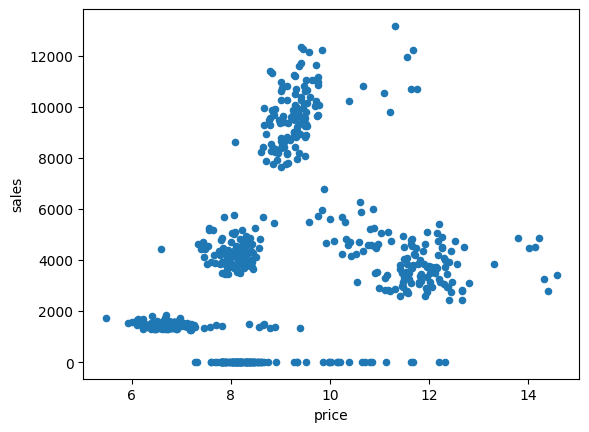

In [9]:
df.plot.scatter(x='price',y='sales')

          price     sales
price  1.000000 -0.203288
sales -0.203288  1.000000
          price     sales
price  1.000000 -0.641344
sales -0.641344  1.000000
          price     sales
price  1.000000  0.540155
sales  0.540155  1.000000
          price     sales
price  1.000000 -0.208886
sales -0.208886  1.000000


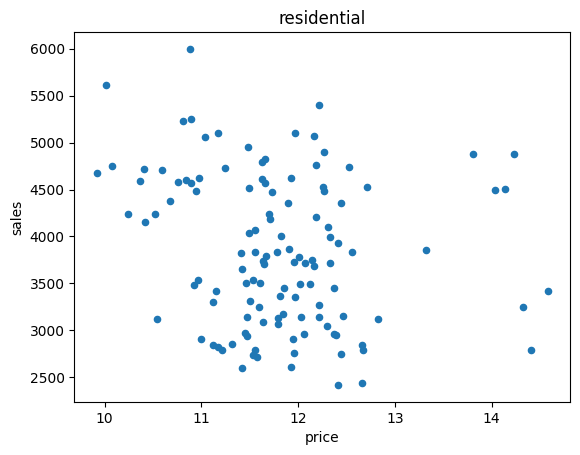

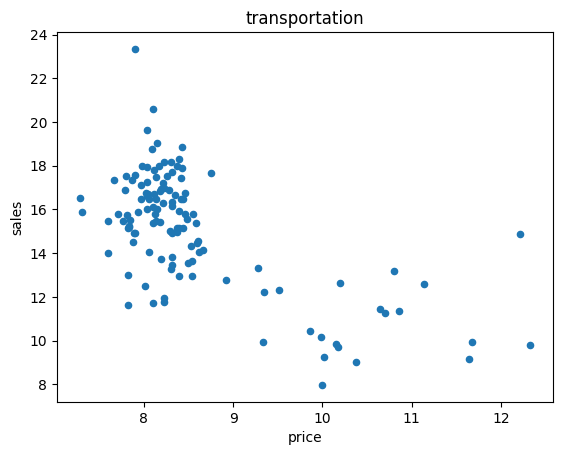

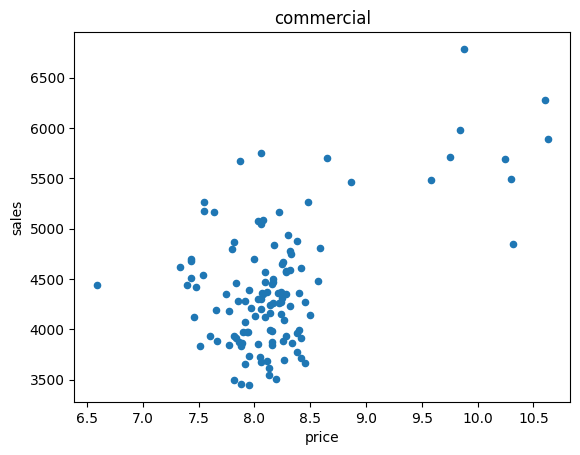

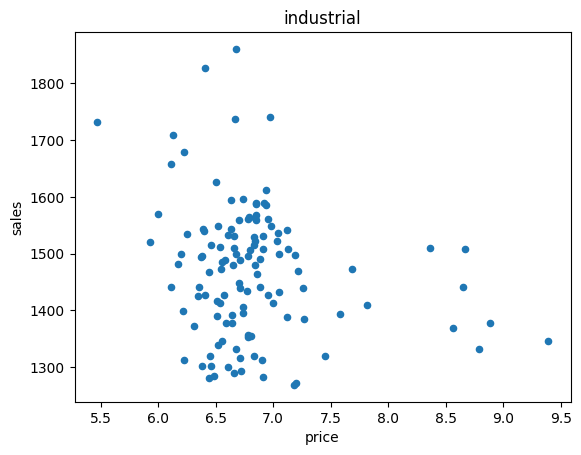

In [10]:
sectors = ['residential','transportation','commercial','industrial']
for sec in sectors:
    df.loc[df['sectorName']==sec,:].plot.scatter(x='price',y='sales',title=sec)
    print( df.loc[df['sectorName']==sec,['price','sales']].corr() )

In [ ]:
df['period']

0      2023-01
1      2023-01
2      2023-01
4      2023-01
5      2023-01
        ...   
720    2013-01
721    2013-01
722    2013-01
724    2013-01
725    2013-01
Name: period, Length: 605, dtype: object

In [ ]:
df['time'] = pd.to_datetime(df['period']) # Create time variable
df.sort_values('time',inplace=True)

In [ ]:
temp = df['period'].to_list()
df['month'] = [ temp[j][5:7] for j in range(len(temp)) ]
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['month'].value_counts()

month
1     55
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
Name: count, dtype: int64

In [ ]:
covid_marker = df['time'][220]

In [ ]:
df['sectorName'].value_counts()

sectorName
transportation    121
all sectors       121
residential       121
industrial        121
commercial        121
Name: count, dtype: int64

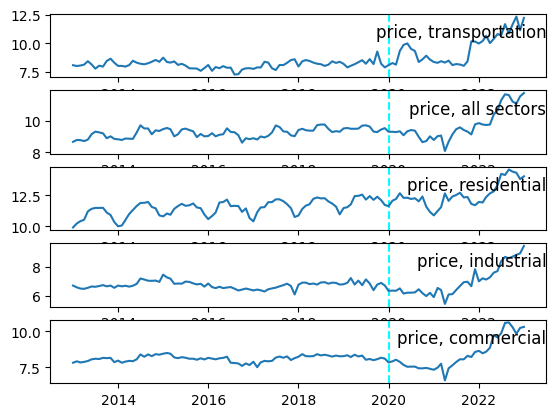

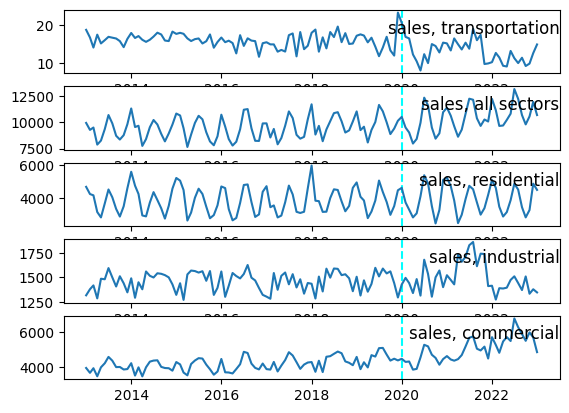

In [ ]:
# Visualize time series:
sectors = df['sectorName'].unique().tolist()
vars = ['price', 'sales']
for var in vars:
    i = 1
    plt.figure()
    for sector in sectors:
        plt.subplot(len(sectors), 1, i)
        plt.axvline(x=covid_marker,color='cyan', linestyle='--')
        plt.plot( df.loc[ df['sectorName']==sector, 'time'], df.loc[ df['sectorName'] == sector, var] )
        plt.title(var+', '+sector, y=0.5, loc='right')
        i += 1
    plt.show()